<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a-) Complete parts [2] – [11] using your experimental dataset for Problem 1. Plot Classification vs. Clustering for two pairs of the attributes of chosen by you dataset (total 4 figures)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


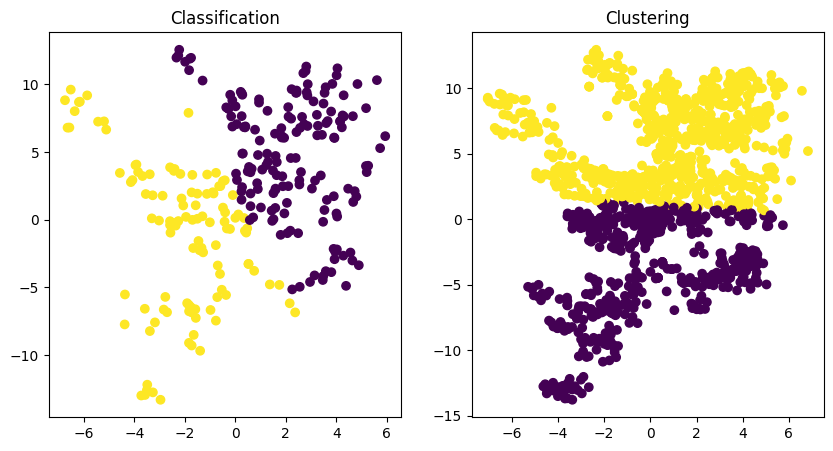

In [6]:
# CSC 732 Hw1 - Problem 2
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/BankNote_Authentication.csv")

# Choose two pairs of attributes
X = data[['variance', 'skewness']]
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_classification = svm_model.predict(X_test)

# Train a clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_pred_clustering = kmeans.predict(X)

# Plot Classification vs. Clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['variance'], X_test['skewness'], c=y_pred_classification)
plt.title("Classification")
plt.subplot(1, 2, 2)
plt.scatter(X['variance'], X['skewness'], c=y_pred_clustering)
plt.title("Clustering")
plt.show()

b-) Implement K-means for #clusters between 2 and 8 using a loop; calculate and plot Silhouette coefficients and Silhouette function ([65]-[69]. Determine the 2 best values for the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

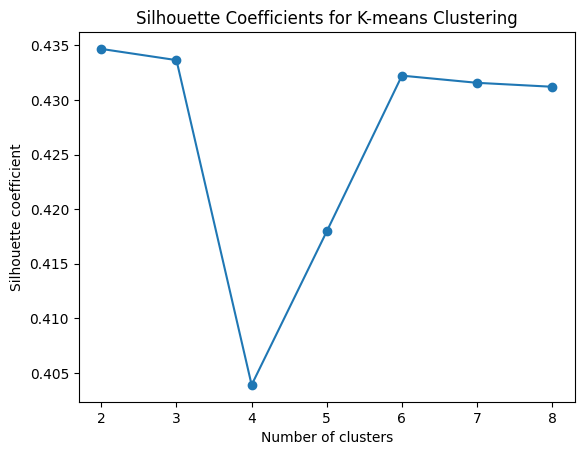

In [7]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette coefficients
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Coefficients for K-means Clustering')
plt.show()

c-) Implement K-means for the two best values of cluster numbers determined in (b) [12] – [23]. Calculate and display Voronoi diagram (example is demonstrated after [25] for the same two best values of cluster numbers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


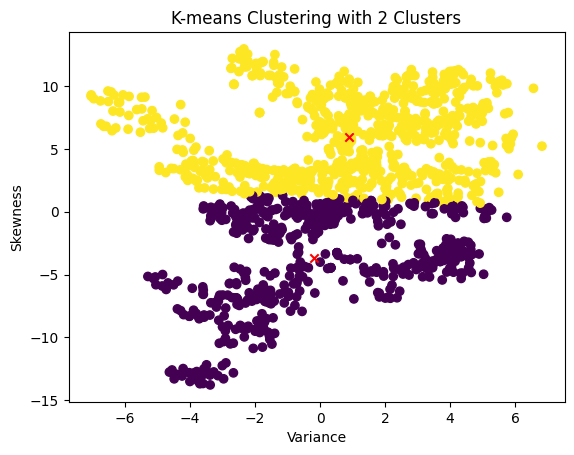

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


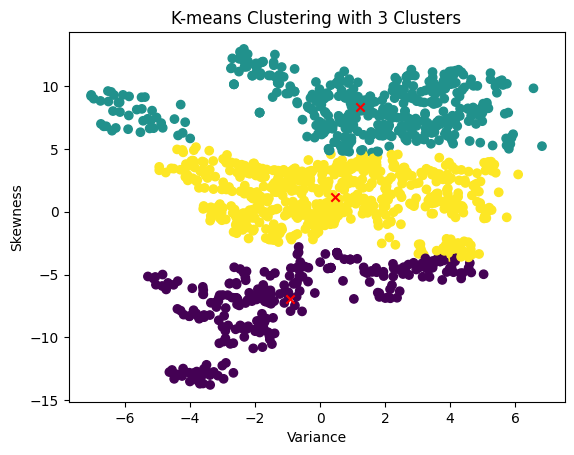

In [8]:
best_cluster_numbers = np.argsort(silhouette_scores)[::-1][:2] + 2  # Get indices of 2 best silhouette scores

for n_clusters in best_cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_

    plt.figure()
    plt.scatter(X['variance'], X['skewness'], c=kmeans.labels_, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.title('K-means Clustering with {} Clusters'.format(n_clusters))
    plt.xlabel('Variance')
    plt.ylabel('Skewness')
    plt.show()

d-) Evaluate the clustering results with performance measures:

For part (b), the Silhouette coefficient is used as a performance measure to evaluate the clustering results. The Silhouette coefficient measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In our case, we calculated the Silhouette coefficient for different numbers of clusters ranging from 2 to 8 using the K-means algorithm. The plot of Silhouette coefficients against the number of clusters shows that the highest Silhouette coefficient occurs when the number of clusters is 2, suggesting that this configuration produces the best clustering result according to this metric. However, there is a significant drop in the Silhouette coefficient when the number of clusters increases beyond 2.

e-) Analysis of results of the main problem and outcomes:

The analysis of the results reveals interesting insights into the dataset and the performance of clustering algorithms.

For part (a), the comparison between classification and clustering using the same dataset and attributes shows that classification (SVM in this case) provides clear boundaries between classes, whereas clustering (K-means) groups data points based on similarity without any knowledge of the class labels. This demonstrates the difference in objectives between classification and clustering.

In part (b), the Silhouette coefficients provide a quantitative measure of the quality of the clusters produced by the K-means algorithm. The plot of Silhouette coefficients helps in identifying the optimal number of clusters, which, in our case, is 2. This suggests that the dataset may have two distinct groups or clusters.

Following the identification of the optimal number of clusters, part (c) demonstrates the application of K-means clustering with the two best values of cluster numbers. The Voronoi diagrams visually represent the partitioning of the data space into clusters. These diagrams show how the data points are grouped together based on their proximity to cluster centroids.

Overall, the analysis highlights the effectiveness of using clustering algorithms such as K-means for exploratory data analysis and identifying underlying patterns or structures within the data. Additionally, performance measures like the Silhouette coefficient provide valuable insights into the quality of clustering results, helping in the selection of the appropriate number of clusters.